# Support Vector Machines

In this exercise we investigate Support Vector Machines. We explore the algorithm using a artificial data set. In particular we explore the possibility to employ different kernel functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

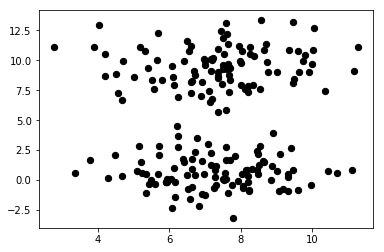

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(200, 2, centers=2, random_state=8, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c='black', s=40);
plt.show()

In [3]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

###### Function from [Source](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

In [4]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

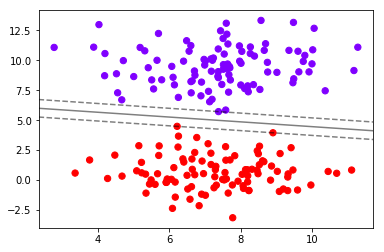

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='rainbow')
plot_svc_decision_function(model);
plt.show()

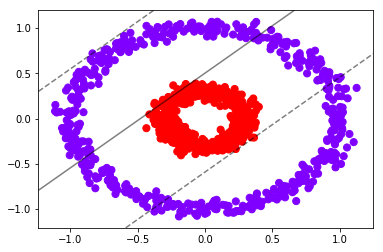

In [6]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(n_samples = 1000, factor=0.3, random_state=0, noise=0.05)

clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plot_svc_decision_function(clf, plot_support=False);
plt.show()

In [7]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

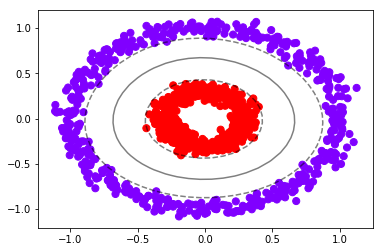

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');
plt.show()